In [1]:
!pip install ipywidgets
import widgets

ModuleNotFoundError: No module named 'widgets'

In [2]:
import io
!pip install bokeh

In [3]:
# Data manipulation
import json 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
from pandas.plotting import scatter_matrix
# interactive visualization
from bokeh.io import output_file, show, output_notebook
from bokeh.models import LinearColorMapper, ColumnDataSource
from bokeh.plotting import figure
from bokeh.palettes import Turbo256
from bokeh.layouts import column, row, gridplot

# Machine Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [5]:
import pandas as pd
df_raw = pd.read_csv('BIRCH_DIANA05.csv')

In [6]:
# ensure all data-points are numeric
df_raw = df_raw.apply(pd.to_numeric, errors='raise')
df_raw.describe().T

count          mean           std           min  \
X                  99677.0  5.442963e+05  6.215166e+03  5.284629e+05   
Y                  99677.0  6.865836e+06  5.133870e+03  6.850672e+06   
OSM_ID             99677.0  2.772973e+08  4.473849e+07  3.619470e+05   
AGE                99677.0  1.907396e+03  2.016354e+02  1.005000e+03   
HEIGHT             99677.0  1.115700e+01  4.237387e+00  3.502350e+00   
AREA               99677.0  1.040034e+02  2.469491e+02  9.326000e+00   
VOLUME             99677.0  1.390000e+03  4.694517e+03  6.246654e+01   
MBR_LENGTH         99677.0  1.320373e+01  9.566508e+00  3.639638e+00   
MBR_WIDTH          99677.0  7.342509e+00  4.629529e+00  1.688715e+00   
MBR_L/W            99677.0  1.888893e+00  7.449959e-01  1.000000e+00   
PERIMETER          99677.0  4.129738e+01  2.958700e+01  1.274652e+01   
WALL_AREA          99677.0  4.985373e+02  6.227244e+02  7.245649e+01   
VERTEX_COUNT(S)    99677.0  6.975972e+00  4.130760e+00  4.000000e+00   
VERTEX_COMPLEXITY  99677.0  1.734550e+00  1.613389e+00  1.851900e-02   
ERI                99677.0  1.042044e+00  8.806968e-02  8.864840e-01   
CONVEX             99677.0  1.040794e+00  8.487771e-02  9.888180e-01   
RI                 99677.0  1.167868e+00  2.631516e-01  4.599600e-02   
DENSITY            99677.0  8.907659e+00  1.834601e+02  6.098800e-02   
NO_POLYLINES       99677.0  1.003200e+00  8.247320e-02  1.000000e+00   
BBOX(A)/AREA       99677.0  9.299895e-01  9.508379e-02  8.171700e-02   
PER/AREA           99677.0  5.249934e-01  1.251738e-01  3.968200e-02   
AREA-VOIDAREA      99677.0  1.031327e+02  2.355602e+02 -4.541380e+01   
Birch Cluster      99677.0  2.939155e+03  2.595976e+03  0.000000e+00   
DIANA Cluster      99677.0  4.974209e+01  8.193187e+00  1.000000e+00   

                            25%           50%           75%           max  
X                  5.403931e+05  5.443043e+05  5.485374e+05  5.626257e+05  
Y                  6.863295e+06  6.865660e+06  6.869093e+06  6.877230e+06  
OSM_ID             2.751148e+08  2.771657e+08  2.806042e+08  1.153501e+09  
AGE                1.922000e+03  1.950000e+03  1.987000e+03  2.016000e+03  
HEIGHT             7.801020e+00  1.010060e+01  1.490420e+01  6.559560e+01  
AREA               5.121925e+01  6.455425e+01  9.094350e+01  3.487084e+04  
VOLUME             3.984820e+02  7.181156e+02  1.254344e+03  2.824272e+05  
MBR_LENGTH         9.759329e+00  1.138584e+01  1.388791e+01  4.266921e+02  
MBR_WIDTH          5.336878e+00  6.037299e+00  7.896826e+00  2.690786e+02  
MBR_L/W            1.416968e+00  1.762375e+00  2.160291e+00  5.198126e+01  
PERIMETER          3.053773e+01  3.503469e+01  4.262851e+01  1.841629e+03  
WALL_AREA          2.389202e+02  3.836982e+02  5.949493e+02  3.058685e+04  
VERTEX_COUNT(S)    5.000000e+00  5.000000e+00  7.000000e+00  2.130000e+02  
VERTEX_COMPLEXITY  1.275000e-01  1.743750e+00  2.952857e+00  1.425000e+01  
ERI                9.999920e-01  1.003718e+00  1.053088e+00  3.562884e+00  
CONVEX             1.000000e+00  1.006725e+00  1.053531e+00  6.700083e+00  
RI                 1.001101e+00  1.256532e+00  1.354014e+00  2.396177e+00  
DENSITY            1.055813e+00  1.278440e+00  1.546667e+00  1.134608e+04  
NO_POLYLINES       1.000000e+00  1.000000e+00  1.000000e+00  1.200000e+01  
BBOX(A)/AREA       8.926660e-01  9.700910e-01  9.985020e-01  1.000000e+00  
PER/AREA           4.589190e-01  5.423660e-01  6.099610e-01  2.070652e+00  
AREA-VOIDAREA      5.121780e+01  6.455400e+01  9.085320e+01  3.366877e+04  
Birch Cluster      2.590000e+02  2.741000e+03  4.517000e+03  9.499000e+03  
DIANA Cluster      4.600000e+01  4.600000e+01  5.300000e+01  1.290000e+02

In [7]:
#Feature (pre)selection

In [8]:
# Select subset of columns aka variables
Columns_of_interest = ["X" ,
                      "Y",
                      "OSM_ID",
                      "AGE",
                      "HEIGHT",
                      "AREA",
                      "VOLUME",
                      "MBR_LENGTH",
                      "MBR_WIDTH",
                      "MBR_L/W",
                      "PERIMETER",
                      "WALL_AREA",
                       "VERTEX_COUNT(S)",
                       "VERTEX_COMPLEXITY",
                       "ERI",
                       "CONVEX",
                       "RI",
                       "DENSITY",
                       "NO_POLYLINES",
                       "BBOX(A)/AREA",
                       "PER/AREA",
                       "AREA-VOIDAREA",
                       "DIANA Cluster"
                      ]
# create new dataframe 
df = df_raw[Columns_of_interest]

In [9]:
#Data Processing & Scaling

In [10]:
# Extract coords from data
df_coords = df[['X', 'Y']]

df_data   = df.drop(['X', 'Y',"DIANA Cluster", "OSM_ID"], axis=1)

# Scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns)

In [11]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['X'].to_numpy()[labels == label]
        y = coords['Y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [12]:
#Approach 1: Principal Component Analysis

In [13]:
# Initialize PCA object and train it with our dataframe!
pca_obj = PCA(n_components=2)
principalComponent_out = pca_obj.fit_transform(df_data)

In [14]:
# Explained variation per principal component:
print(pca_obj.explained_variance_ratio_)

[0.99241435 0.00312722]


In [15]:
# safe to dataframe, rename columns as principal component 1 & 2
pca_df = pd.DataFrame(data = principalComponent_out
             , columns = ['pc1', 'pc2'])

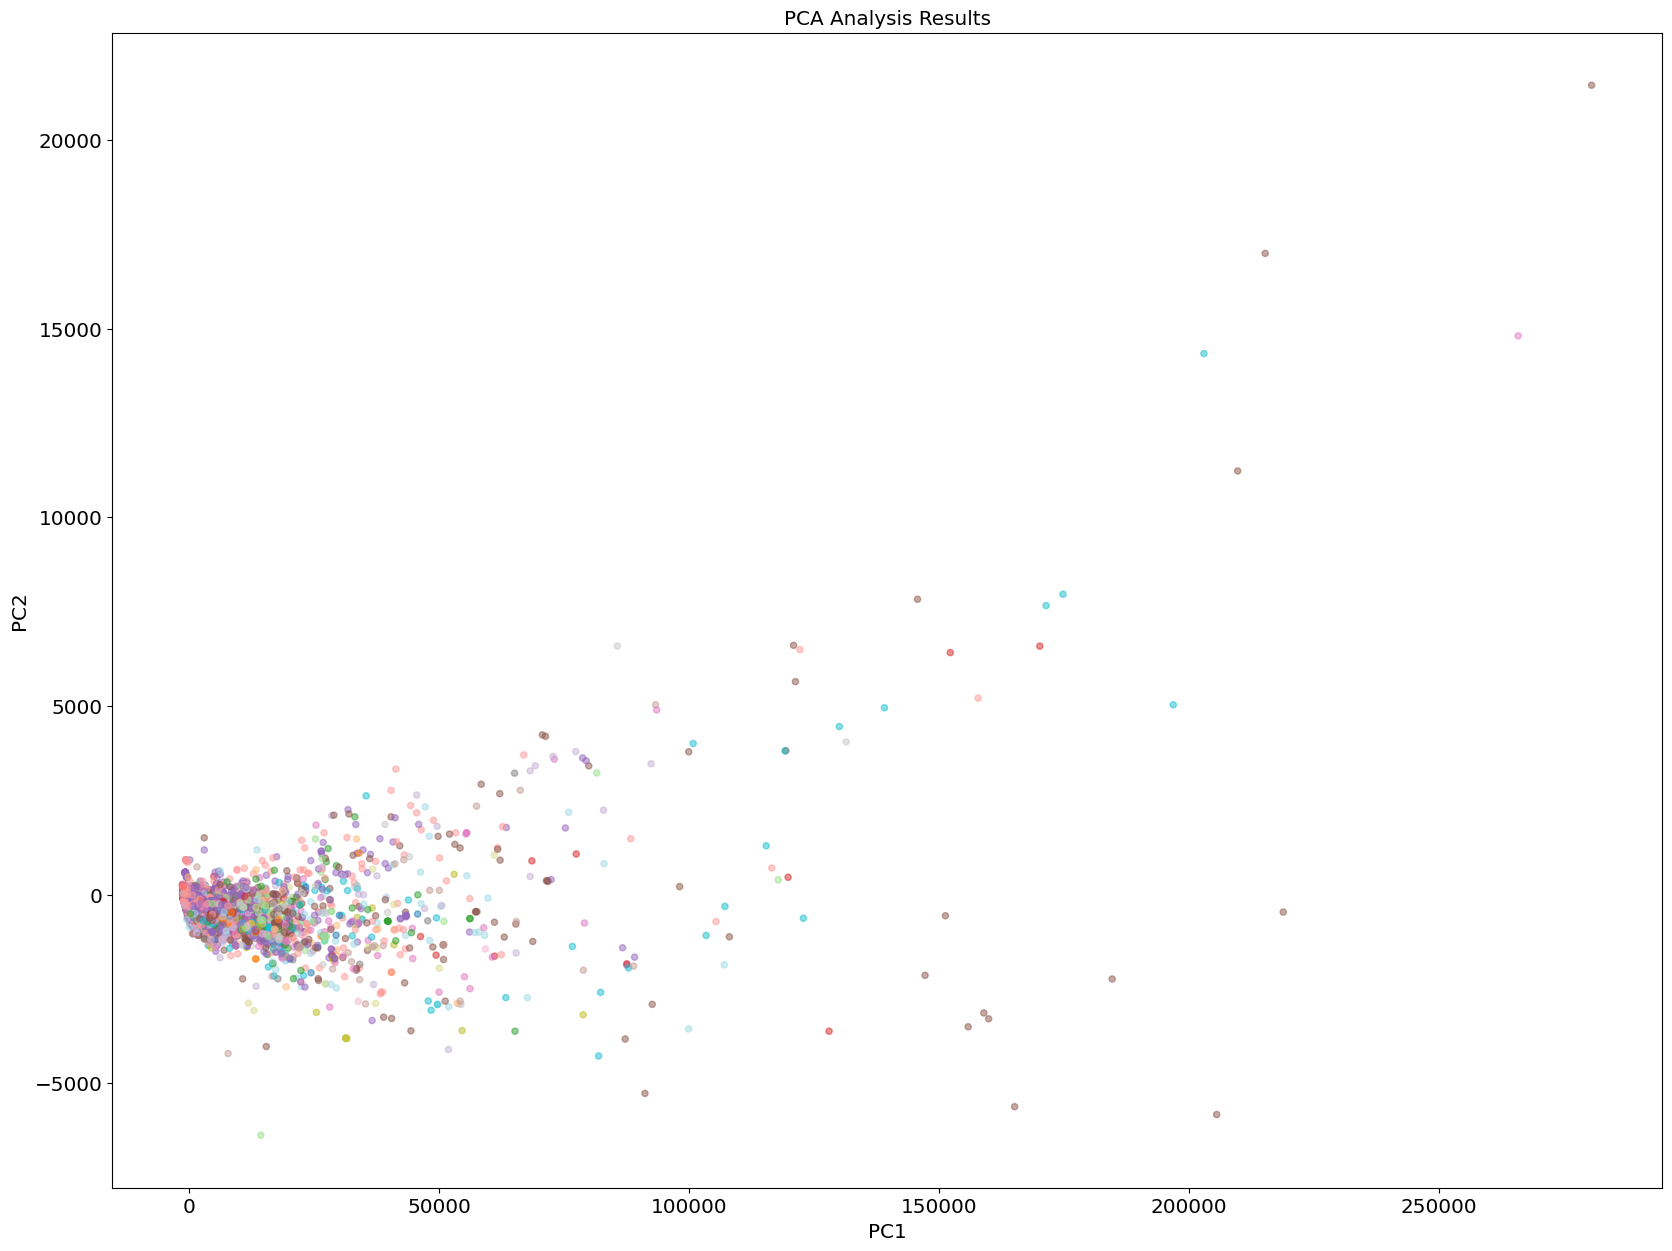

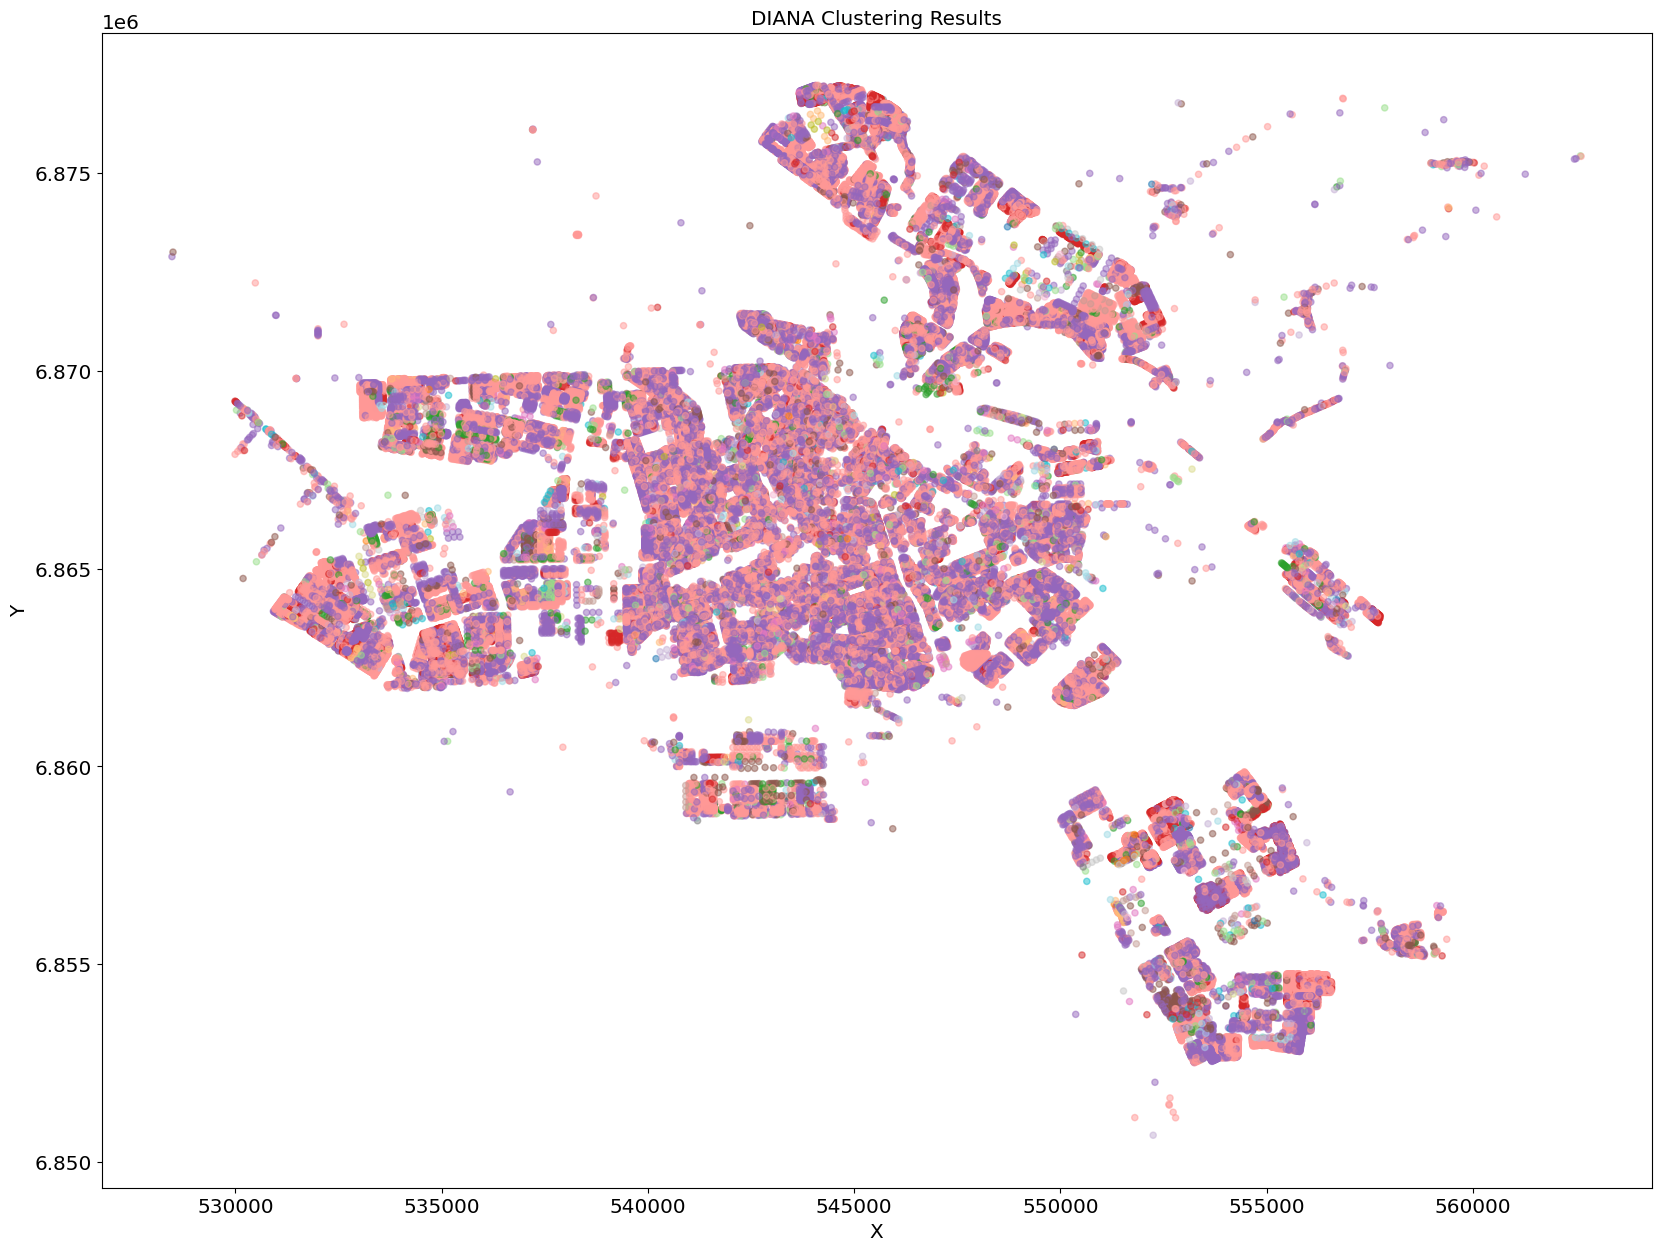

In [16]:
# Set plot parameters
plt.rcParams.update({'font.size': 12,
                     'figure.figsize': (10, 8),
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'legend.fontsize': 'large'})

# plot PCA result
plt.figure(figsize=(20, 15))
plt.scatter(pca_df['pc1'], pca_df['pc2'], s=20, c=df["DIANA Cluster"], alpha=0.5, cmap='tab20')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Analysis Results')
plt.show()

# plot original map with clusters
plt.figure(figsize=(20, 15))
plt.scatter(df['X'], df['Y'], s=20, c=df["DIANA Cluster"], alpha=0.5, cmap='tab20')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DIANA Clustering Results')
plt.show()

In [17]:
#Approach 2: T-SNE

In [18]:
# initializing tsne, 
# experiment with perplexity 
tsne_obj = TSNE(n_components=2, perplexity=15)
data_tsne = tsne_obj.fit_transform(df_data)

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [19]:
# tsne data to dataframe
tsneDF = pd.DataFrame(data=data_tsne, columns=["tsne1", "tsne2"])

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



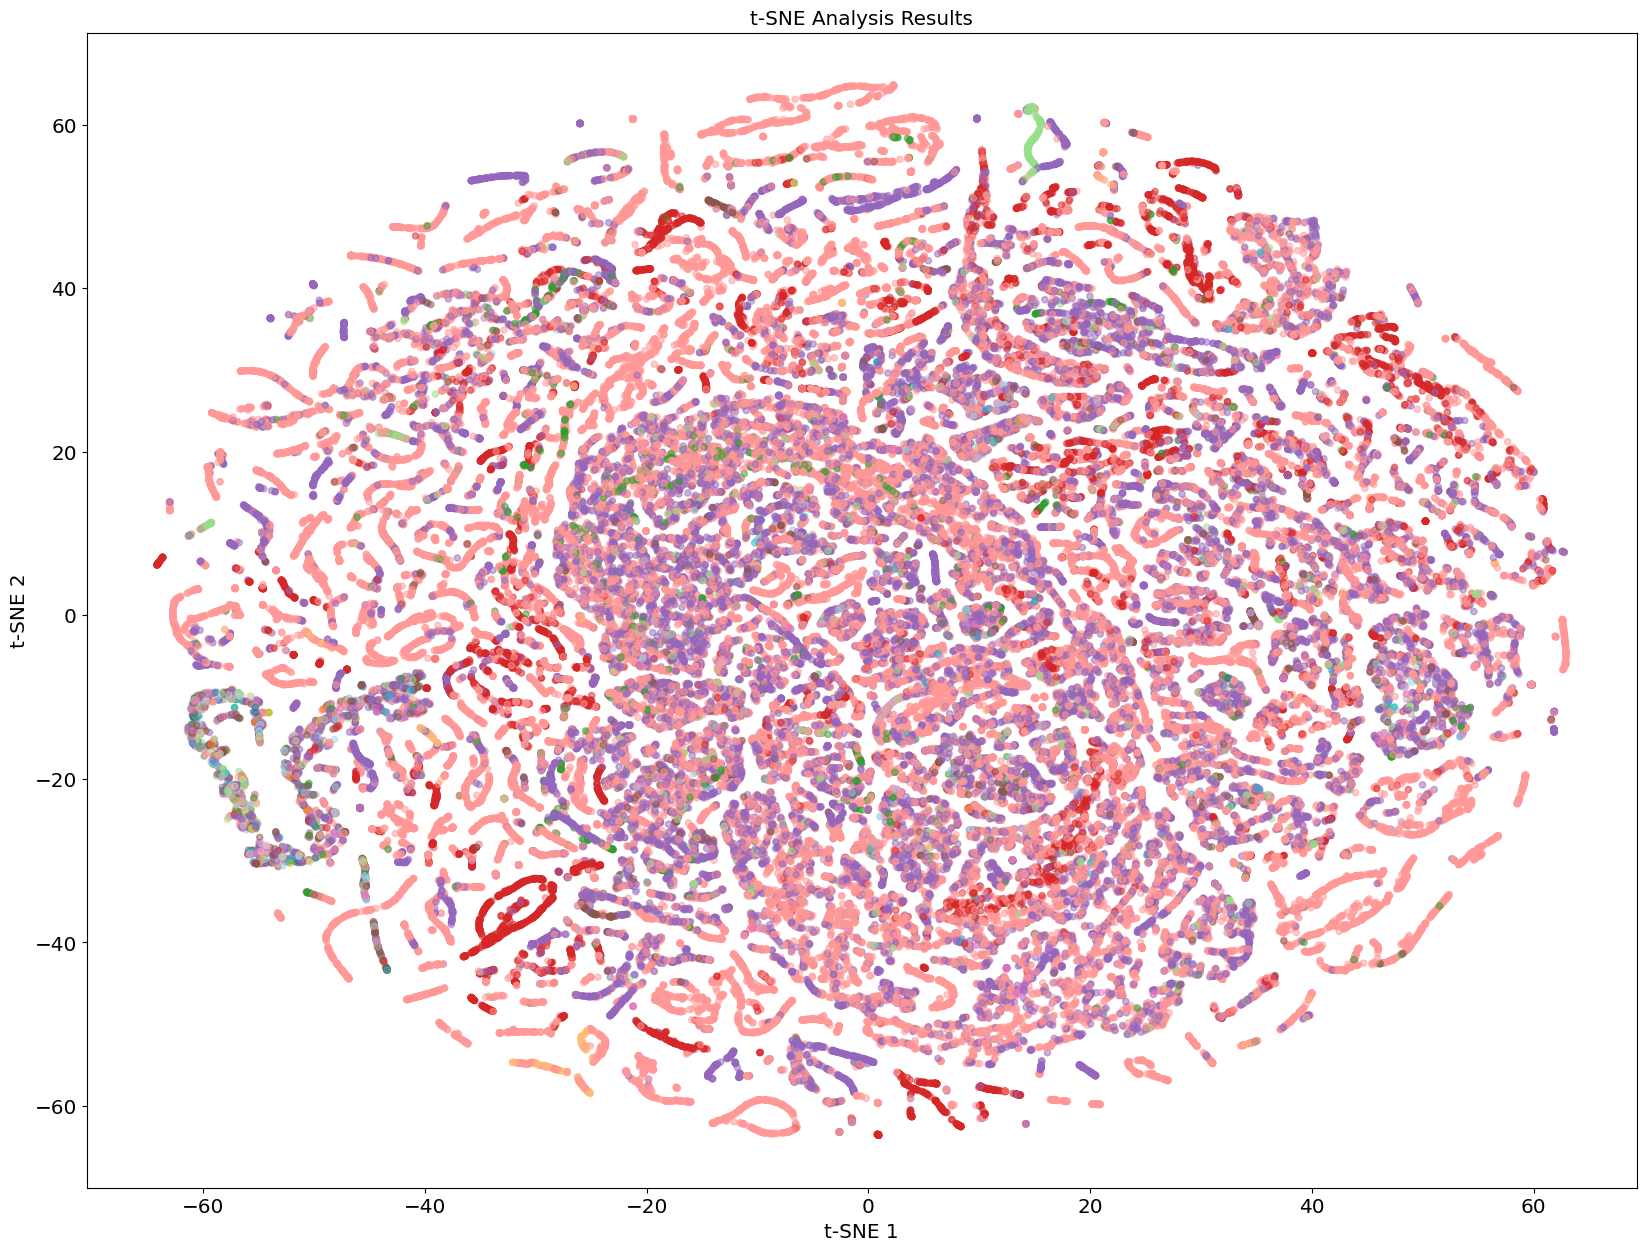

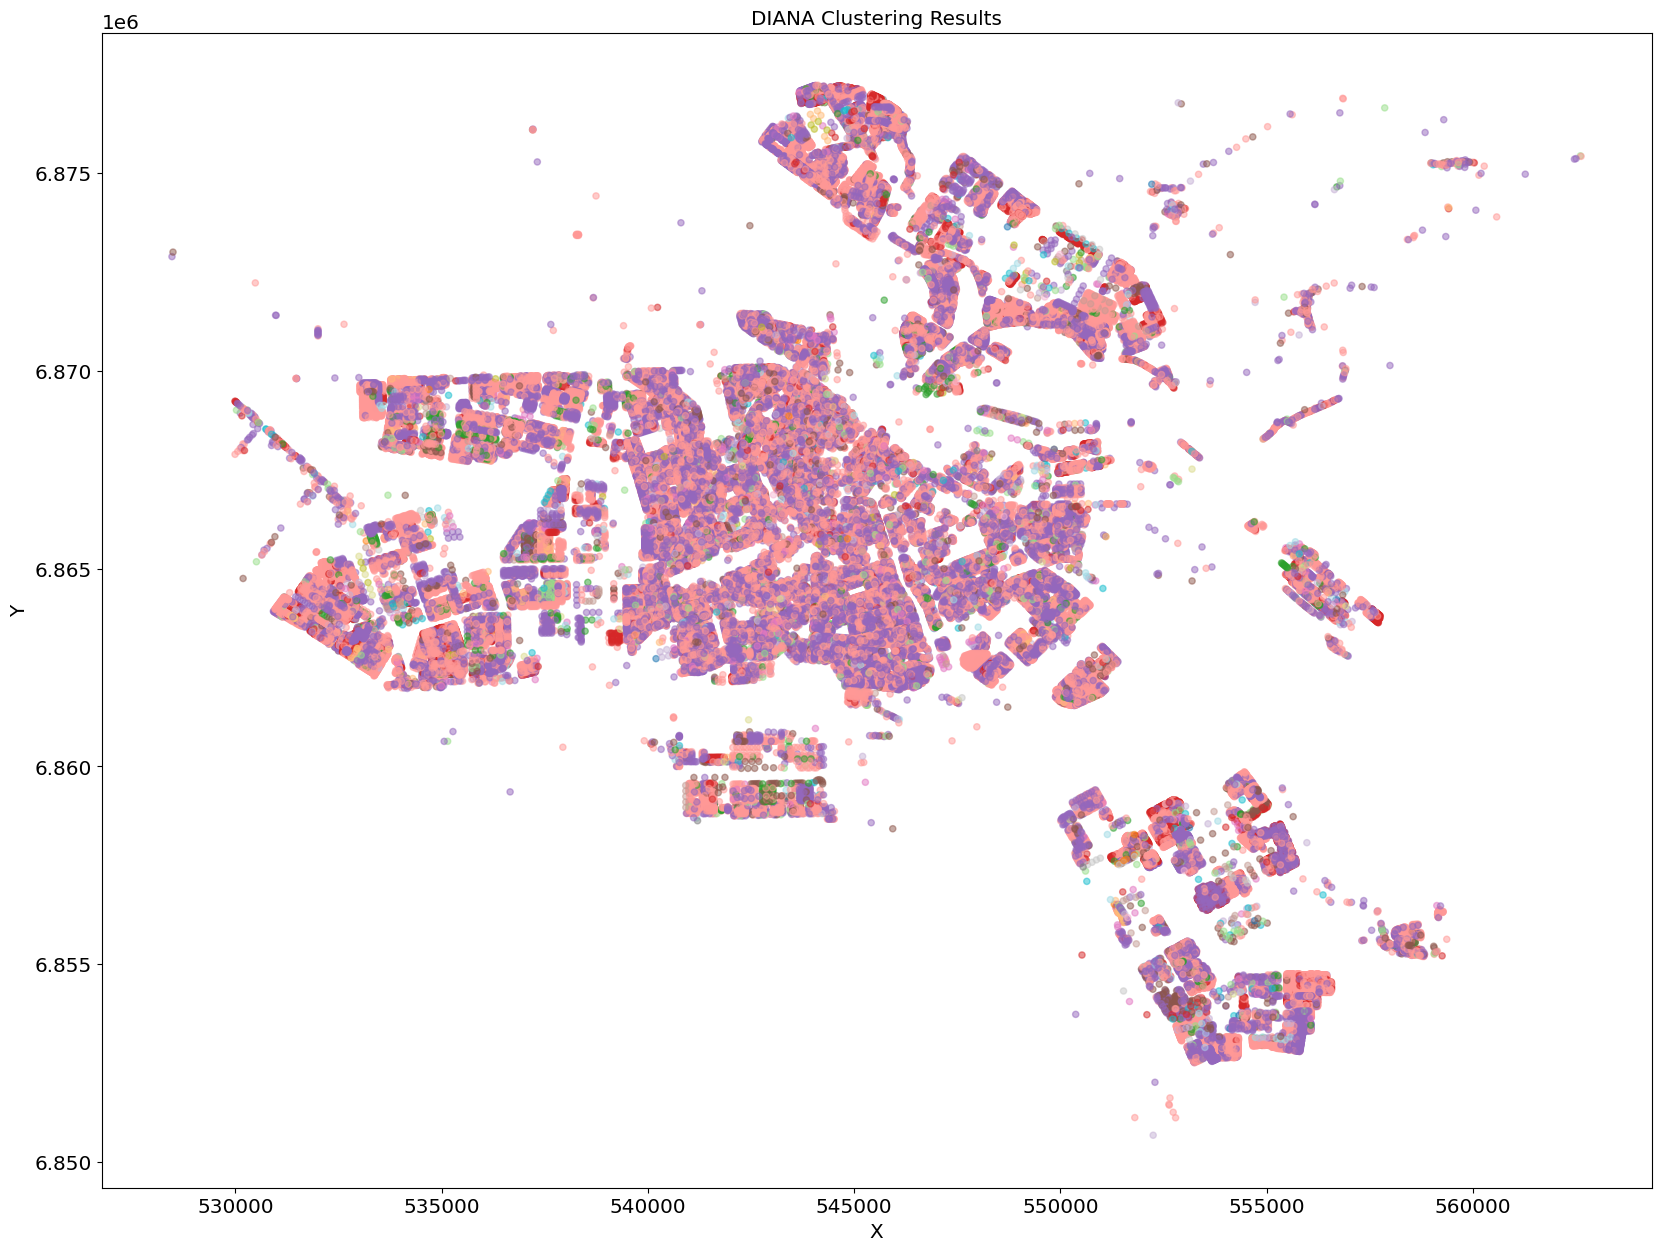

In [20]:
# Set plot parameters
plt.rcParams.update({'font.size': 12,
                     'figure.figsize': (10, 8),
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'legend.fontsize': 'large'})

# initializing tsne, 
# experiment with perplexity 
tsne_obj = TSNE(n_components=2, perplexity=15)
data_tsne = tsne_obj.fit_transform(df_data)

# tsne data to dataframe
tsneDF = pd.DataFrame(data=data_tsne, columns=["tsne1", "tsne2"])

# plot tsne results
plt.figure(figsize=(20, 15))
plt.scatter(tsneDF['tsne1'], tsneDF['tsne2'], s=20, c=df["DIANA Cluster"], alpha=0.5, cmap='tab20')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Analysis Results')
plt.show()

# plot original map with clusters
plt.figure(figsize=(20, 15))
plt.scatter(df['X'], df['Y'], s=20, c=df["DIANA Cluster"], alpha=0.5, cmap='tab20')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DIANA Clustering Results')
plt.show()

In [21]:
import numpy as np

# Define list of features to compute statistics for
features = ["Year", "Height", "Area", "Envelope Area", "Wall Area", "Perimeter", "Length/Width", "H/A",
            "Total av floor area", "Volume", "Vertex Number", "Vertex Complexity", "Per/Area", "Density"]

# Iterate over each cluster and compute statistics for each feature
for i in range(1, 20):
    # Create a new DataFrame for the cluster
    cluster_df = df[df['Cluster'] == i][features]

    # Compute statistics for each feature
    ave = cluster_df.mean()
    med = cluster_df.median()
    mod = cluster_df.mode().iloc[0]
    s_range = cluster_df.max() - cluster_df.min()
    std = cluster_df.std()
    var = cluster_df.var()

    # Combine statistics into a new DataFrame
    ave_df = pd.concat([ave, med, mod, s_range, std, var], axis=1)
    ave_df.columns = ['Mean', 'Median', 'Mode', 'Range', 'Standard Deviation', 'Variance']
    
    # Transpose the DataFrame so features are columns and statistics are rows
    ave_df = ave_df.transpose()
    ave_df.columns = features
    
    # Save the DataFrame as a separate table
    table_name = f'Ave_cluster{i}.csv'
    ave_df.to_csv(table_name, index=False)

KeyError: 'Cluster'